In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import pyGadget
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('text', usetex=True)

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

# Sink Accretion History

In [3]:
simname = {'vanilla':r'J = 0',
        'X0': '',#r'J = J$_0$', 
        'X1': '',#r'J = 10 J$_0$', 
        'X2': '',#r'J = 100 J$_0$', 
        'J0': r'J = J$_0$', 
        'J1': r'J = 10 J$_0$', 
        'J2': r'J = 100 J$_0$', 
        'J3': r'J = 1000 J$_0$'}
name = ['vanilla', 'J0', 'J1', 'J2', 'J3', 'X0', 'X1', 'X2']

In [4]:
sinkdata = pd.HDFStore(os.getenv("HOME")+'/data/stampede/sinkdata.hdf5')
dataV = sinkdata['vanilla']
data0 = sinkdata['xr_tau_J0']
data1 = sinkdata['xr_tau_J1']
data2 = sinkdata['xr_tau_J2']
data3 = sinkdata['xr_tau_J3']
data4 = sinkdata['XR_sfr_1e-1']
data5 = sinkdata['XR_sfr_1e-2']
data6 = sinkdata['XR_sfr_1e-3']

In [5]:
sinkdata

<class 'pandas.io.pytables.HDFStore'>
File path: /home/jhummel/data/stampede/sinkdata.hdf5
/XR_sfr_1e-1            frame        (shape->[3563,9])
/XR_sfr_1e-2            frame        (shape->[5476,9])
/XR_sfr_1e-3            frame        (shape->[2750,9])
/cr00                   frame        (shape->[3262,9])
/cr01                   frame        (shape->[3183,9])
/cr02                   frame        (shape->[3476,9])
/cr03                   frame        (shape->[4055,9])
/cr04                   frame        (shape->[5283,9])
/cr05                   frame        (shape->[6850,9])
/vanilla                frame        (shape->[2546,9])
/xr_tau_J0              frame        (shape->[3572,9])
/xr_tau_J1              frame        (shape->[2259,9])
/xr_tau_J2              frame        (shape->[4912,9])
/xr_tau_J3              frame        (shape->[7401,9])

In [6]:
sinkdata.close()

In [7]:
sinksV = dataV.set_index('time')
sinks0 = data0.set_index('time')
sinks1 = data1.set_index('time')
sinks2 = data2.set_index('time')
sinks3 = data3.set_index('time')
sinks4 = data4.set_index('time')
sinks5 = data5.set_index('time')
sinks6 = data6.set_index('time')

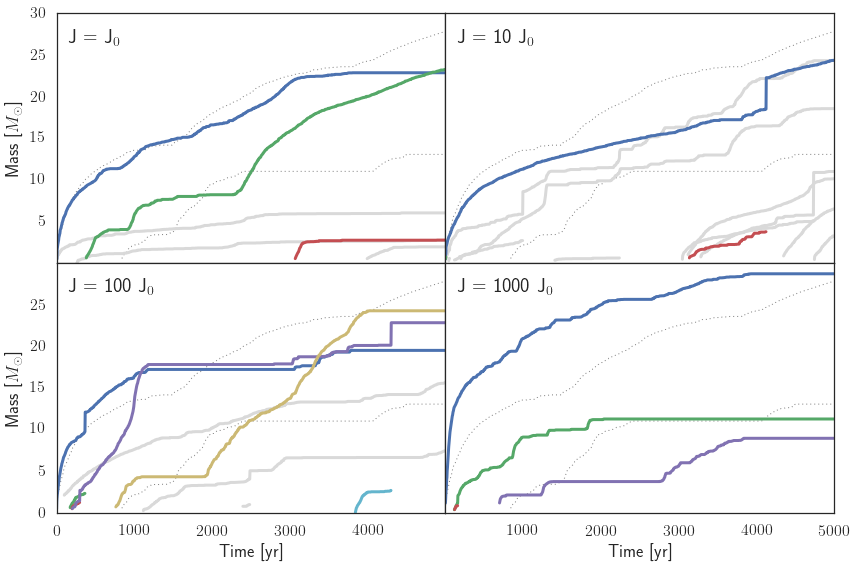

In [8]:
fig = plt.figure(2, figsize=(12,8))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

slw = 3
sls = ['-', '--']

for i, (ax, shielded, unshielded) in enumerate([(ax0,sinks0, sinks4), (ax1,sinks1, sinks5),
                                                (ax2,sinks2, sinks6), (ax3,sinks3, None)]):
    for sinkID in sinksV.ID.unique():
        growth = sinksV[sinksV.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=1, ls=':', color='.5')
    if unshielded is not None:
        for j,sinkID in enumerate(unshielded.ID.unique()):
            growth = unshielded[unshielded.ID == sinkID]['mass']
            ax = growth.plot(ax=ax, grid=False, lw=3, color='.85')
    for j,sinkID in enumerate(shielded.ID.unique()):
        growth = shielded[shielded.ID == sinkID]['mass']
        ax = growth.plot(ax=ax, grid=False, lw=3, ls=sls[j/6])
    ax.text(.03,.93, simname[name[i+1]], ha='left', va='top', size=20, transform=ax.transAxes)

ax0.xaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)


for ax in fig.axes:
    ax.set_xlim(0,5000)
    ax.set_ylim(0,30)
ax0.set_yticks((5,10,15,20,25,30))
ax2.set_yticks((0,5,10,15,20,25))
ax2.set_xticks((0,1000,2000,3000,4000))
ax3.set_xticks((1000,2000,3000,4000,5000))

ax0.set_ylabel('Mass [$M_{\odot}$]')
ax2.set_ylabel('Mass [$M_{\odot}$]')
ax2.set_xlabel('Time [yr]')
ax3.set_xlabel('Time [yr]')

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/sink_masses.png', bbox_inches='tight')

In [9]:
total_mass = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5, data6]):
    mtot = data[['time','mass']].groupby('time').sum()
    mtot.rename(columns = {'mass':name[i]}, inplace=True)
    total_mass.append(mtot)

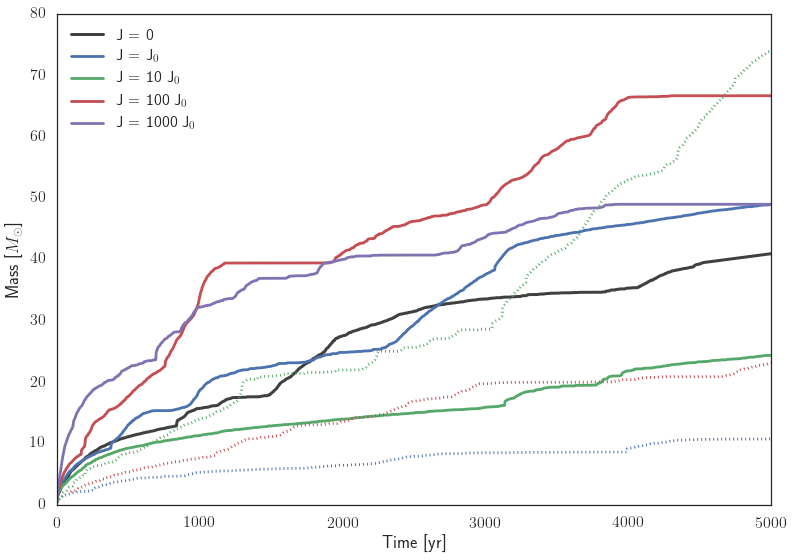

In [10]:
slw = 3
with sns.color_palette(n_colors=4):
    fig, ax = plt.subplots()
df = total_mass[0]
ax.plot(df.index, df.vanilla, label=simname['vanilla'], lw=slw, color='.25')
for i,df in enumerate(total_mass[1:5]):
    ax.plot(df.index, df[name[i+1]], label=simname[name[i+1]])
for i,df in enumerate(total_mass[5:]):
    ax.plot(df.index, df[name[i+5]], ls=':')

    
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,80)
#plt.ylim(1,100); plt.semilogy()

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.savefig('figures/sinks/total_sink_mass.png', bbox_inches='tight')

In [11]:
most_massive_sink = []
for i,data in enumerate([dataV, data0, data1, data2, data3, data4, data5, data6]):
    mms = data[['time','mass']].groupby('time').max()
    mms.rename(columns = {'mass':name[i]}, inplace=True)
    most_massive_sink.append(mms)

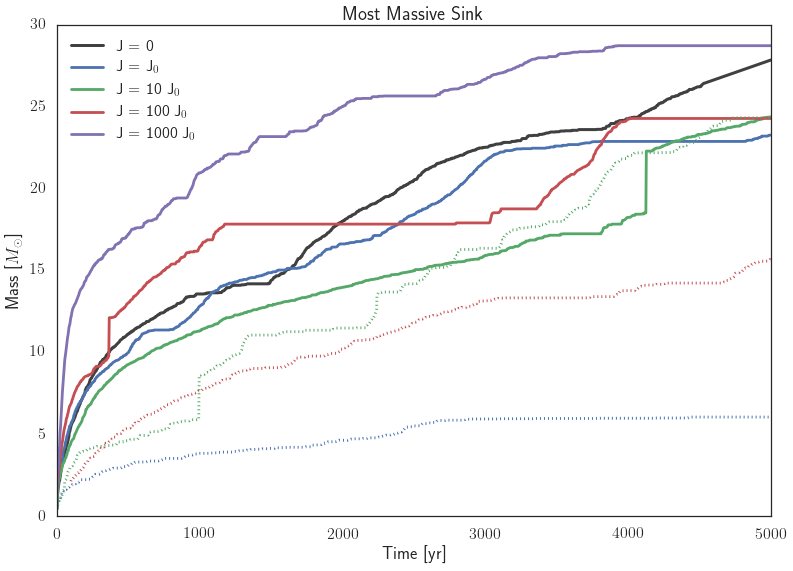

In [12]:
slw = 3
count = 0
with sns.color_palette(n_colors=4):
    fig, ax = plt.subplots()
df = most_massive_sink[0]
ax.plot(df.index, df.vanilla, label=simname['vanilla'], lw=slw, color='.25')
for i,df in enumerate(most_massive_sink[1:5]):
    ax.plot(df.index, df[name[i+1]], label=simname[name[i+1]])
for i,df in enumerate(most_massive_sink[5:]):
    ax.plot(df.index, df[name[i+5]], ls=':')

    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,30)
#plt.ylim(1,100); plt.semilogy()

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Most Massive Sink')
plt.savefig('figures/sinks/most_massive_sink.png', bbox_inches='tight')

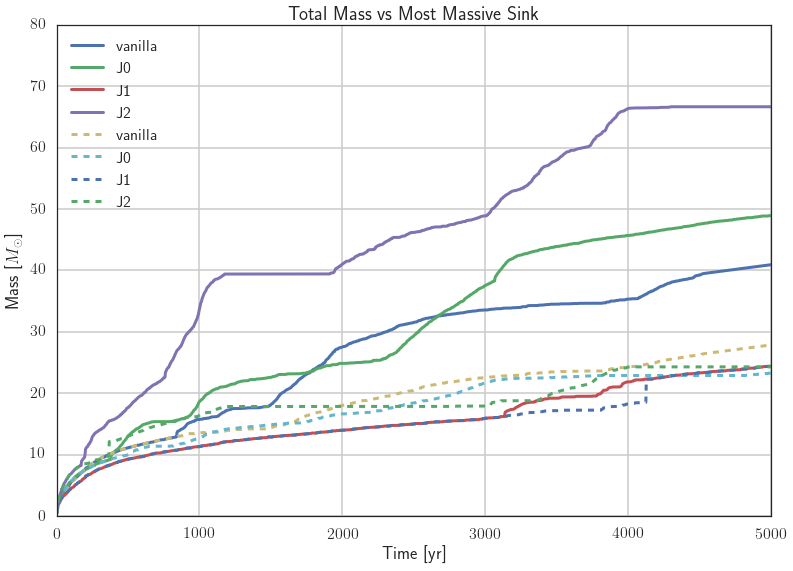

In [13]:
slw = 3

plt.figure()
ax = gca()
for i in xrange(4):
    total_mass[i].plot(ax=ax, lw=slw)
for i in xrange(4):
    most_massive_sink[i].plot(ax=ax, ls='--', lw=slw, label=False)
    
leg = plt.legend(loc=0)
plt.xlim(0,5000)
plt.ylim(0,80)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Total Mass vs Most Massive Sink')
plt.savefig('figures/sinks/mms_comparison.png', bbox_inches='tight')

In [14]:
slw = 3
for i in xrange(4):
    plt.plot(time, biggest_sink[i]/total_mass[i], lw=slw, label=name[i])
leg = plt.legend(loc=0)
plt.xlim(0,5000)
#plt.ylim(0,70)

plt.ylabel('Mass [$M_{\odot}$]')
plt.xlabel('Time [yr]')
plt.title('Mass Fraction')
plt.savefig('figures/sinks/mms_fraction.png', bbox_inches='tight')

NameError: name 'time' is not defined

In [ ]:
most_massive_sink = []
for sim in [simV, sim1, sim2, sim3]:
    mms = 0
    for sink in sim.sinks:
        if sink.mass.max() > mms:
            mms = sink.mass.max()
    most_massive_sink.append(mms)

In [ ]:
sms = 15
slw = 3

n_sims = 4
index = [0, 1, 2, 3]
index2 = 2
n_tot = [2,2,6,3]
n_pri = [2,2,2,3]
n_sec = 4
m_tot = [41., 23.2, 73.9, 10.7]
m_pri = [41., 23.3, 43., 10.7]
m_sec = 30.9

fig = plt.figure(1, figsize=(8, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(index, m_pri, 'rs', ms=23, label="Central Disk")
ax1.plot(index, m_tot, 'bD', ms=20, label="Total Mass")
ax1.legend(loc=2)

ax2.plot(index, n_pri, 'rs', ms=23, label="Central Disk")
ax2.plot(index, n_tot, 'bD', ms=20, label="Total")
#ax2.legend(loc=2)


ax1.set_xlim(-.5,3.5)
ax2.set_xlim(-.5,3.5)

ax1.set_ylim(0, 80)
ax2.set_ylim(0,7.5)

ax1.xaxis.set_visible(False)
ax1.set_yticks((10,20,30,40,50,60,70,80))

ax2.set_xticks(index)
ax2.set_xticklabels((0, 1, 10 , 100))

ax1.set_title("5000yr after sink formation")
ax1.set_ylabel("Sink Mass [M$_{\odot}$]")
ax2.set_xlabel(r"J$_{\textsc{xr}}$/J$_{0}$")
ax2.set_ylabel("Number of Sinks")

plt.tight_layout(w_pad=0.0,h_pad=0.0)
fig.savefig('figures/sinks/mms.png', bbox_inches='tight')